In [1]:
import gdown
import pandas as pd
# Download the file using gdown
!gdown 1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK

Downloading...
From: https://drive.google.com/uc?id=1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK
To: /content/MJMusicDataset.csv
100% 815k/815k [00:00<00:00, 28.0MB/s]


In [2]:
     data = pd.read_csv('/content/MJMusicDataset.csv')
     print(data.head())

                              name dastgah instrument  zero_corssing  \
0         ney-mahoor-ebrahimi .mp3     D_2        I_4          65545   
1  Mohammad_Shojaei_nei_Mahoor.mp3     D_2        I_4          59788   
2      Arash_Samimi_nei_Mahoor.mp3     D_2        I_4          85072   
3          19 sarebaang mahoor.mp3     D_2        I_4          89980   
4                     Amjadian.mp3     D_2        I_4          58134   

   spectral_centroid_mean  spectral_centroid_var  spectral_rolloff_mean  \
0             1938.040517            303472.4474            2815.166310   
1             1956.981873            774951.2677            2971.032035   
2             2735.525193            575671.7929            4268.615855   
3             2629.389833            406198.9319            4071.233715   
4             1659.262559            332341.1003            2789.041468   

   spectral_rolloff_var  chroma_1_mean  chroma_2_mean  ...  mfcc_11_var  \
0          1.754412e+06       0.515210   

In [3]:
print(data.isnull().sum())
data.dropna(inplace=True)

name                      0
dastgah                   0
instrument                0
zero_corssing             0
spectral_centroid_mean    0
                         ..
mfcc_16_var               0
mfcc_17_var               0
mfcc_18_var               0
mfcc_19_var               0
mfcc_20_var               0
Length: 72, dtype: int64


**Balancing dataset**



In [4]:
# Split data into features (X) and labels (y)
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
data = data.drop(['instrument','name'], axis=1)
X = data.drop('dastgah', axis=1)
y = data['dastgah']

# Count the number of samples in each class before balancing
unique, counts = np.unique(y, return_counts=True)
print("Class counts before balancing:", dict(zip(unique, counts)))

# Use RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=64)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Count the number of samples in each class after balancing
unique_resampled, counts_resampled = np.unique(y_resampled, return_counts=True)
print("Class counts after balancing:", dict(zip(unique_resampled, counts_resampled)))

# Print the shape of the new balanced dataset
print("\nNew balanced dataset shape:", X_resampled.shape, y_resampled.shape)

Class counts before balancing: {'D_0': 122, 'D_1': 122, 'D_2': 139, 'D_3': 144, 'D_4': 116, 'D_5': 141, 'D_6': 142}
Class counts after balancing: {'D_0': 116, 'D_1': 116, 'D_2': 116, 'D_3': 116, 'D_4': 116, 'D_5': 116, 'D_6': 116}

New balanced dataset shape: (812, 69) (812,)


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_resampled and y_resampled are already defined
labels_df = pd.DataFrame(y_resampled, columns=['dastgah'])

# Concatenate the data matrix and the label DataFrame
data = pd.concat([X_resampled, labels_df], axis=1)

# Convert labels to integers
label_mapping = {label: idx for idx, label in enumerate(labels_df['dastgah'].unique())}
data['dastgah_int'] = data['dastgah'].map(label_mapping)

# Ensure all columns except the label column are numeric
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
corr_matrix = data[numeric_cols + ['dastgah_int']].corr()

# Create heatmap using seaborn
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt='.3f', yticklabels=corr_matrix.columns)

# Adjust font size of annotations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust margins of PDF file
plt.savefig('PIcS1.pdf', bbox_inches='tight')
plt.show()

# Revert labels back to original
data['dastgah'] = data['dastgah_int'].map({v: k for k, v in label_mapping.items()})
data.drop(columns=['dastgah_int'], inplace=True)


Output hidden; open in https://colab.research.google.com to view.

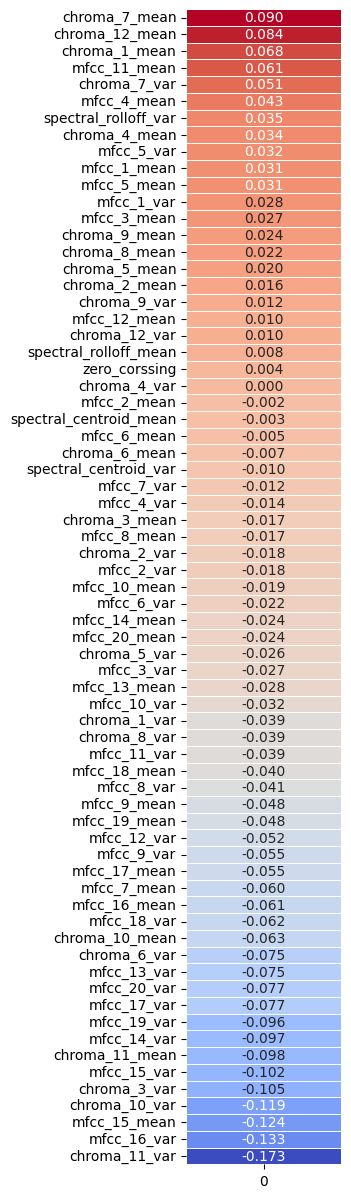

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_resampled and X_resampled are already defined
labels_df = pd.DataFrame(y_resampled, columns=['dastgah'])

# Concatenate the data matrix and the label DataFrame
data = pd.concat([X_resampled, labels_df], axis=1)

# Convert labels to integers
label_mapping = {label: idx for idx, label in enumerate(labels_df['dastgah'].unique())}
data['dastgah_int'] = data['dastgah'].map(label_mapping)

# Ensure all columns except the label column are numeric
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'dastgah_int' for correlation calculation
numeric_cols.remove('dastgah_int')

# Calculate correlation matrix
corr_matrix1 = data[numeric_cols].corrwith(data['dastgah_int']).sort_values(ascending=False)

# Create heatmap using seaborn
plt.figure(figsize=(2, 15))
sns.heatmap(corr_matrix1.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10}, fmt='.3f', cbar=False)

# Rotate x-axis tick labels to be horizontal
plt.xticks(rotation=0)
plt.show()

# Revert labels back to original
data['dastgah'] = data['dastgah_int'].map({v: k for k, v in label_mapping.items()})
data.drop(columns=['dastgah_int'], inplace=True)


In [7]:
top_16_features = corr_matrix1.head(16).index.tolist()
data_train= data[top_16_features + ['dastgah']]
print(data_train)


     chroma_7_mean  chroma_12_mean  chroma_1_mean  mfcc_11_mean  chroma_7_var  \
0         0.147926        0.224913       0.313241      4.627033      0.069000   
1         0.172749        0.149601       0.273068    -21.546146      0.023120   
2         0.056556        0.116372       0.390317     -1.911680      0.004121   
3         0.206671        0.283500       0.132657     -4.977403      0.090737   
4         0.390417        0.672468       0.247183    -17.156363      0.109467   
..             ...             ...            ...           ...           ...   
807       0.123933        0.427011       0.646458     -6.583026      0.026869   
808       0.281922        0.193881       0.072602     -6.222386      0.086079   
809       0.193709        0.299603       0.546076     -9.485244      0.050254   
810       0.359442        0.119076       0.060373      2.182932      0.138261   
811       0.221392        0.092544       0.060705    -15.084551      0.090236   

     mfcc_4_mean  spectral_

In [8]:
from sklearn.model_selection import train_test_split
np.random.seed(64)
array =data_train.values
np.random.shuffle(array)  # Shuffle the array
shuffled_df = pd.DataFrame(array, columns=data_train.columns)
X = shuffled_df.drop(columns='dastgah').values
y = shuffled_df['dastgah'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)
print('Train:', X_train.shape, y_train.shape, '\nTest:', X_test.shape, y_test.shape)

Train: (649, 16) (649,) 
Test: (163, 16) (163,)


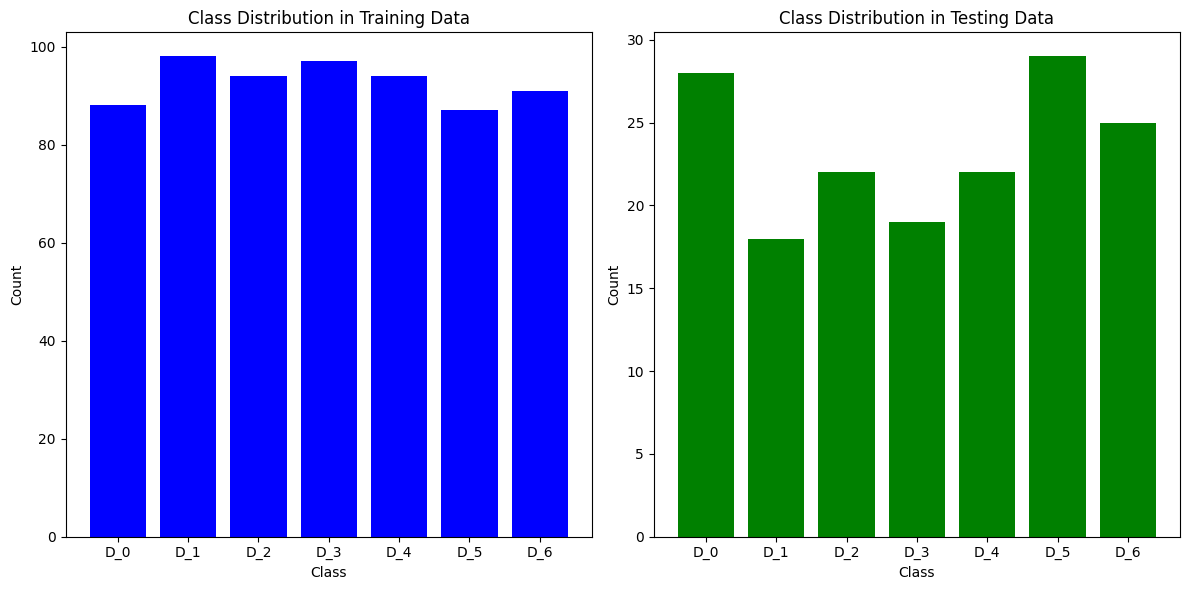

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_train and y_test are your labels for the training and testing datasets respectively

# Get unique classes and their counts for training data
classes_train, counts_train = np.unique(y_train, return_counts=True)

# Get unique classes and their counts for testing data
classes_test, counts_test = np.unique(y_test, return_counts=True)

# Plotting the bar chart
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Training data distribution
ax[0].bar(classes_train, counts_train, color='blue')
ax[0].set_title('Class Distribution in Training Data')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')

# Testing data distribution
ax[1].bar(classes_test, counts_test, color='green')
ax[1].set_title('Class Distribution in Testing Data')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
print(X_train.shape)
X_test = scaler.transform(X_test)
print(X_test.shape)


(649, 16)
(163, 16)


In [11]:
from sklearn.decomposition import PCA
np.random.seed(64)
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Apply LDA to reduce dimensionality to 2
lda = LinearDiscriminantAnalysis(n_components=2)
X_train= lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
X_valid = lda.transform(X_valid)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

In [ ]:
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
grid.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.154 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.169 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.162 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.138 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.178 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.131 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.169 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.162 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.146 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.202 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.131 total time=   0.1s
[CV 2/5] END ...............C=10, kernel=linear;,

SVC(C=1, kernel='linear')

**linear SVM**

In [ ]:
from sklearn.svm import SVC
model = SVC(C=1, kernel='linear',probability=True, random_state=64)
model.fit(X_train, y_train)

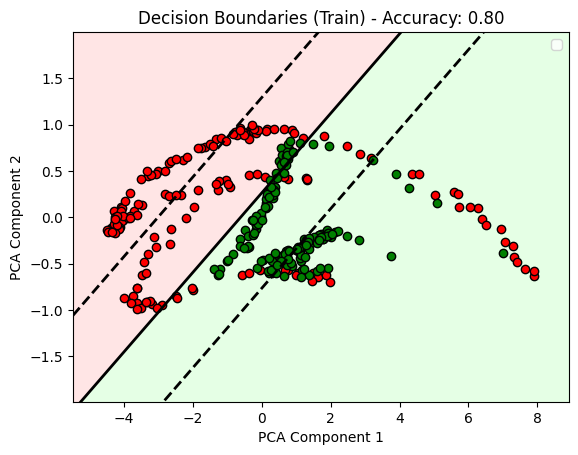

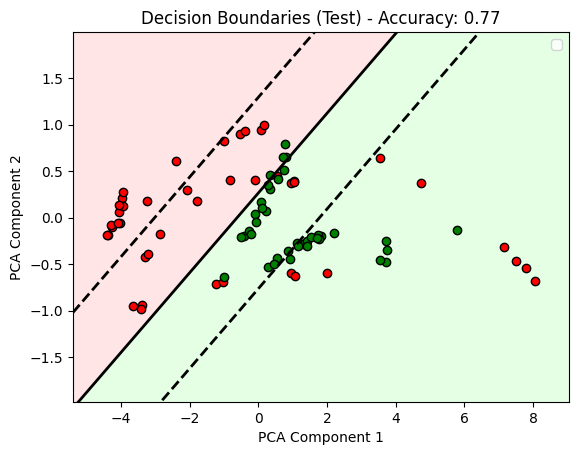

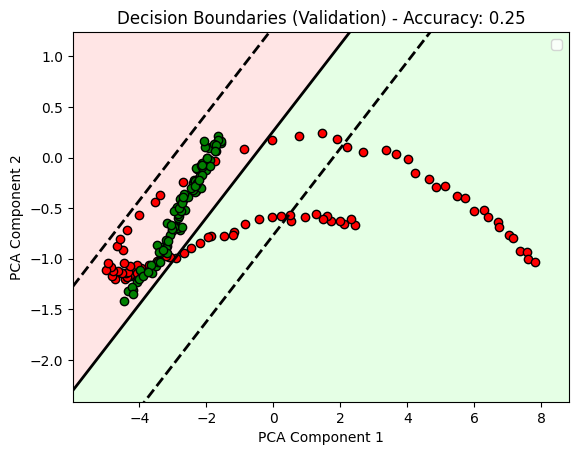

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.decomposition import PCA
np.random.seed(64)
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Define custom colormap in background
    colors = ['#FFAAAA', '#AAFFAA']
    cmap_background = ListedColormap(colors[:len(np.unique(y))])
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
    # Define scatter plot colors
    scatter_colors = ['r', 'g']
    for i, color in zip(range(len(np.unique(y))), scatter_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolors='k')
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)

    # Plotting the decision boundary and margins
    w = model.coef_[0]
    b = model.intercept_[0]
    x0 = np.linspace(x_min, x_max, 200)
    decision_boundary = -(w[0] / w[1]) * x0 - (b / w[1])
    margin = 1 / np.sqrt(np.sum(w ** 2))
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    plt.plot(x0, decision_boundary, 'k-', linewidth=2)
    plt.plot(x0, gutter_up, 'k--', linewidth=2)
    plt.plot(x0, gutter_down, 'k--', linewidth=2)

    #sv = model.support_vectors_
    #plt.scatter(sv[:, 0], sv[:, 1], linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.ylim([y_min, y_max])
    plt.xlim([x_min, x_max])
    plt.title(f'{title} - Accuracy: {accuracy:.2f}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(loc='best')
    plt.show()

# Plot decision boundaries for the training set
plot_decision_boundaries(X_train, y_train, model, "Decision Boundaries (Train)")
# Plot decision boundaries for the test set
plot_decision_boundaries(X_test, y_test, model, "Decision Boundaries (Test)")



In [ ]:
model.support_vectors_

array([[-5.65547450e-01,  9.03845069e-01],
       [-2.67771773e+00, -2.91673615e-01],
       [-7.84977483e-01,  9.20188363e-01],
       [-9.10059229e-01,  3.31632788e-01],
       [ 6.28603952e+00,  1.00600595e-01],
       [-3.50809079e-01,  9.37582444e-01],
       [-5.78667706e-01, -6.17445809e-01],
       [ 6.44699015e-01,  9.54546994e-01],
       [ 7.47188243e-01, -5.71912515e-01],
       [ 1.18419444e+00,  8.59830130e-01],
       [ 5.02836489e+00,  2.40209401e-01],
       [ 7.06991249e+00, -2.66578728e-01],
       [-3.72625580e-01,  8.44853286e-01],
       [-7.09168949e-01,  8.93083368e-01],
       [-1.04557346e+00,  4.03647716e-01],
       [ 6.04579950e+00,  1.09602707e-01],
       [-2.49682684e+00, -8.44343255e-01],
       [-1.97214720e+00,  1.10088627e-01],
       [ 1.05498830e-01,  4.33753866e-01],
       [-3.62326610e+00, -7.63582384e-01],
       [ 1.49050947e+00, -5.95182764e-01],
       [-1.19188958e+00,  8.59009322e-01],
       [-3.33905828e+00, -9.07945872e-01],
       [ 4.

In [ ]:
model.n_support_

array([110, 109], dtype=int32)

In [ ]:
print('weights : ',model.coef_[0] , 'bias : ',model.intercept_[0])

weights :  [ 0.38310301 -0.89369536] bias :  0.23613040763258727


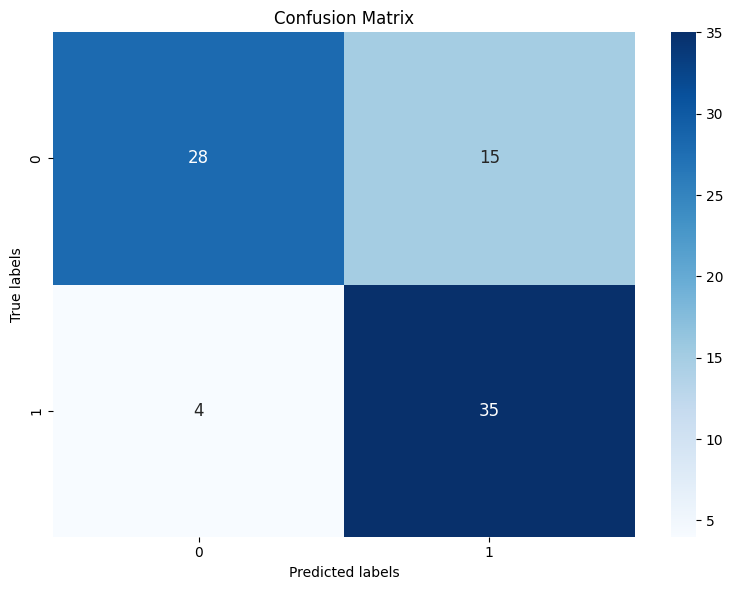

Accuracy : 0.7682926829268293


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
np.random.seed(64)
y_pred = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()
from sklearn.metrics import accuracy_score
print('Accuracy :',accuracy_score(y_test,y_pred))

**rbf kernel



In [ ]:
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10,], 'kernel': ['rbf']}
#param_grid = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['poly','rbf','sigmoid'],'coef0': [0, 0.1, 1, 2, 5, 1], 'degree':[2, 3, 4, 5],'gamma':['scale', 'auto']}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)
grid.fit(X_train, y_train)
grid.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.162 total time=   0.0s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.154 total time=   0.0s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.154 total time=   0.0s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.177 total time=   0.0s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.155 total time=   0.0s
[CV 1/5] END ...................C=1, kernel=rbf;, score=0.177 total time=   0.0s
[CV 2/5] END ...................C=1, kernel=rbf;, score=0.169 total time=   0.0s
[CV 3/5] END ...................C=1, kernel=rbf;, score=0.169 total time=   0.0s
[CV 4/5] END ...................C=1, kernel=rbf;, score=0.162 total time=   0.0s
[CV 5/5] END ...................C=1, kernel=rbf;, score=0.155 total time=   0.0s
[CV 1/5] END ..................C=10, kernel=rbf;, score=0.215 total time=   0.0s
[CV 2/5] END ..................C=10, kernel=rbf;,

SVC(C=10)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

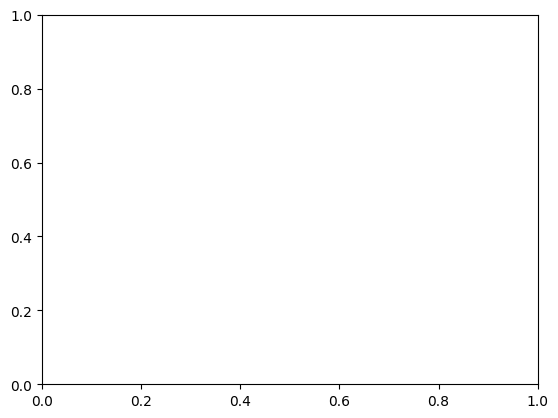

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Assume X_train, X_test, y_train, y_test are already defined

# Training the SVM model
model = SVC(C=10, kernel='rbf', probability=True, random_state=64)
model.fit(X_train, y_train)

# Map labels to integers for plotting
unique_labels = np.unique(y_train)
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
y_train_mapped = np.array([label_mapping[label] for label in y_train])
y_test_mapped = np.array([label_mapping[label] for label in y_test])

# Define a colormap for 7 classes
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#800080']
cmap = ListedColormap(colors[:len(unique_labels)])

def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    plt.show()

# Predict and evaluate on the training set
y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
plot_decision_boundaries(X_train, y_train_mapped, model, f"Decision Boundaries (Train) - Accuracy: {train_acc:.2f}")
print(f"Training Accuracy: {train_acc:.2f}")

# Predict and evaluate on the test set
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
plot_decision_boundaries(X_test, y_test_mapped, model, f"Decision Boundaries (Test) - Accuracy: {test_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")


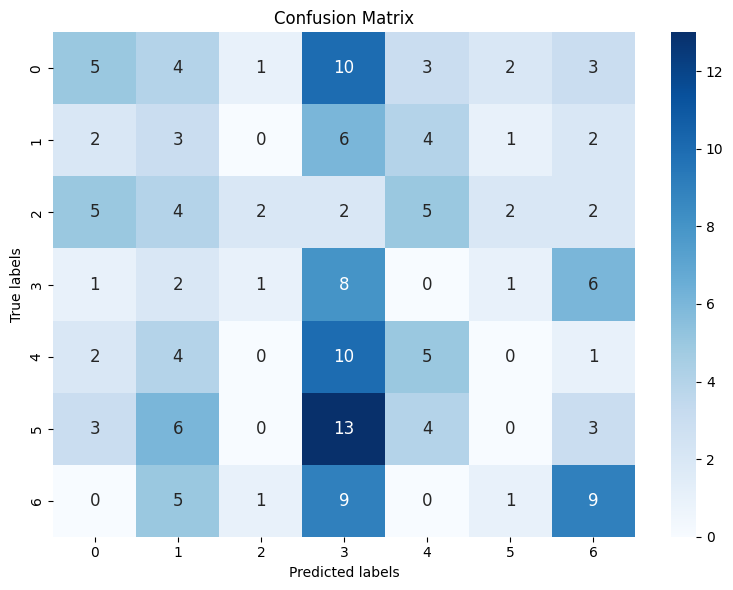

Accuracy : 0.19631901840490798


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
np.random.seed(64)
y_pred = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()
from sklearn.metrics import accuracy_score
print('Accuracy :',accuracy_score(y_test,y_pred))

متاسفانه ورد ارور داد در اینجا گزارش را به صورت تصویر می آورم

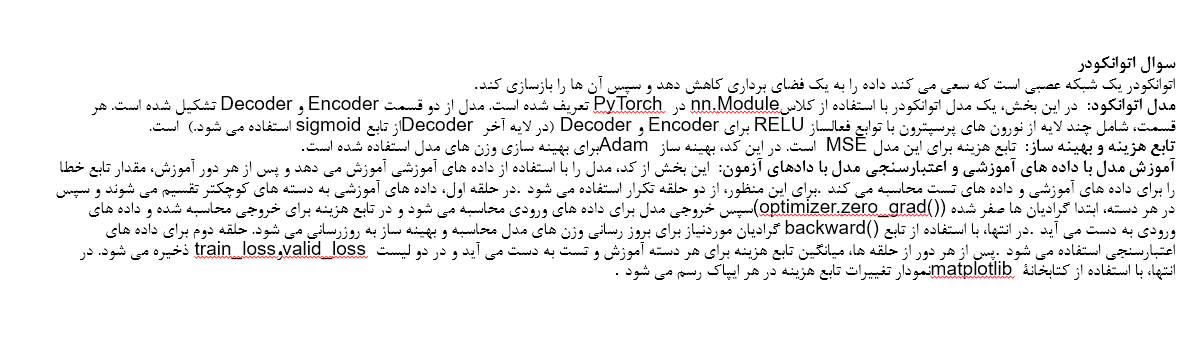

In [13]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
np.random.seed(64)

# Hyperparameters
num_epochs = 20
batch_size = 100
learning_rate = 0.005

# Convert numpy arrays to PyTorch tensors
train_dataset = torch.tensor(X_train, dtype=torch.float32)
test_dataset = torch.tensor(X_test, dtype=torch.float32)

# Create TensorDatasets and DataLoaders
train_loader = DataLoader(TensorDataset(train_dataset, train_dataset), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(test_dataset, test_dataset), batch_size=batch_size, shuffle=False)

# Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(X_train.shape[1], 500),
            nn.ReLU(True),
            nn.Linear(16, 10),
            nn.ReLU(True),
            nn.Linear(10, 5),
            nn.ReLU(True),
            nn.Linear(5, 3),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(3, 5),
            nn.ReLU(True),
            nn.Linear(5, 10),
            nn.ReLU(True),
            nn.Linear(10, 16),
            nn.ReLU(True),
            nn.Linear(16, X_train.shape[1]),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Create autoencoder object
autoencoder = Autoencoder()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=learning_rate)

# Train the model
train_loss = []
test_loss = []

for epoch in range(num_epochs):
    # Train
    autoencoder.train()
    total_loss = 0
    for images, _ in train_loader:
        images = Variable(images.view(-1, X_train.shape[1]))
        optimizer.zero_grad()
        outputs = autoencoder(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_loss.append(total_loss / len(train_loader))



    # Test
    total_loss = 0
    with torch.no_grad():
        for images, _ in test_loader:
            images = Variable(images.view(-1, X_train.shape[1]))
            outputs = autoencoder(images)
            loss = criterion(outputs, images)
            total_loss += loss.item()

    test_loss.append(total_loss / len(test_loader))

    print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}'
          .format(epoch + 1, num_epochs, train_loss[-1], test_loss[-1]))

# Save the trained model weights
torch.save(autoencoder.state_dict(), 'autoencoder.pth')

# Plot loss
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x500 and 16x10)

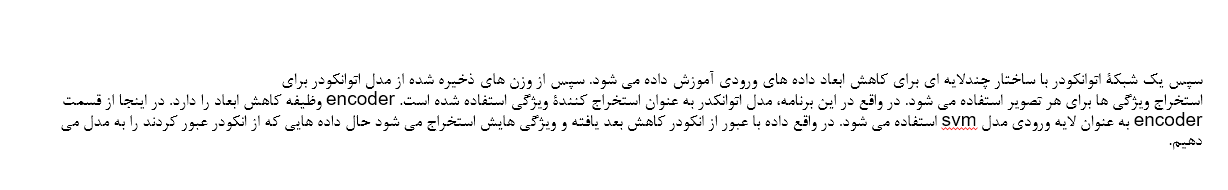

Epoch [1/20], Train Loss: 0.7072, Valid Loss: 0.7996, Test Loss: 0.6253, Train Acc: 0.5640, Valid Acc: 0.3200, Test Acc: 0.7073
Epoch [2/20], Train Loss: 0.6167, Valid Loss: 0.9441, Test Loss: 0.5893, Train Acc: 0.6159, Valid Acc: 0.5000, Test Acc: 0.5244
Epoch [3/20], Train Loss: 0.5878, Valid Loss: 1.0974, Test Loss: 0.5779, Train Acc: 0.4939, Valid Acc: 0.5000, Test Acc: 0.5244
Epoch [4/20], Train Loss: 0.5799, Valid Loss: 1.1992, Test Loss: 0.5632, Train Acc: 0.4939, Valid Acc: 0.5000, Test Acc: 0.5244
Epoch [5/20], Train Loss: 0.5690, Valid Loss: 1.2585, Test Loss: 0.5496, Train Acc: 0.5274, Valid Acc: 0.4300, Test Acc: 0.6098
Epoch [6/20], Train Loss: 0.5432, Valid Loss: 1.2863, Test Loss: 0.5446, Train Acc: 0.6768, Valid Acc: 0.3300, Test Acc: 0.6585
Epoch [7/20], Train Loss: 0.5386, Valid Loss: 1.3120, Test Loss: 0.5401, Train Acc: 0.6982, Valid Acc: 0.3200, Test Acc: 0.6585
Epoch [8/20], Train Loss: 0.5293, Valid Loss: 1.3229, Test Loss: 0.5341, Train Acc: 0.7073, Valid Acc: 0

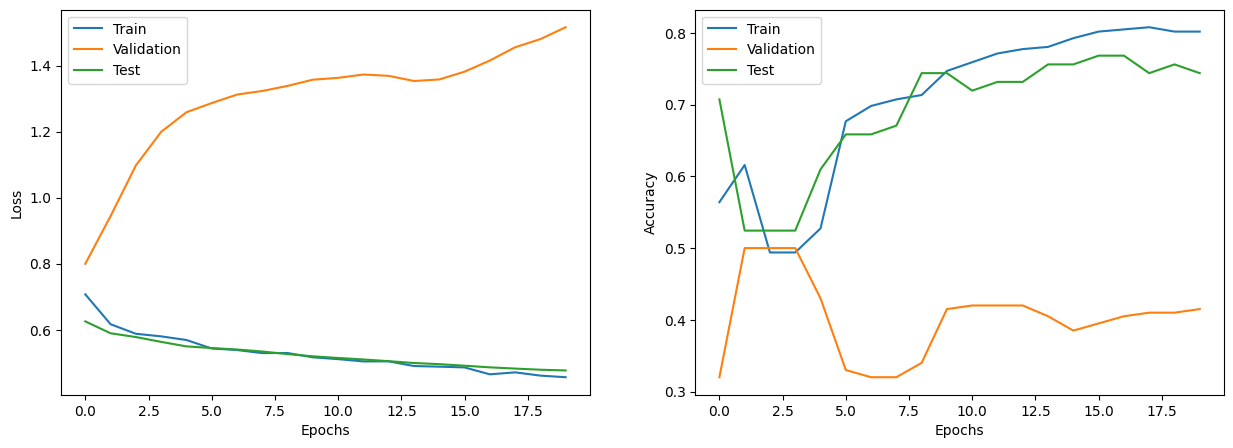

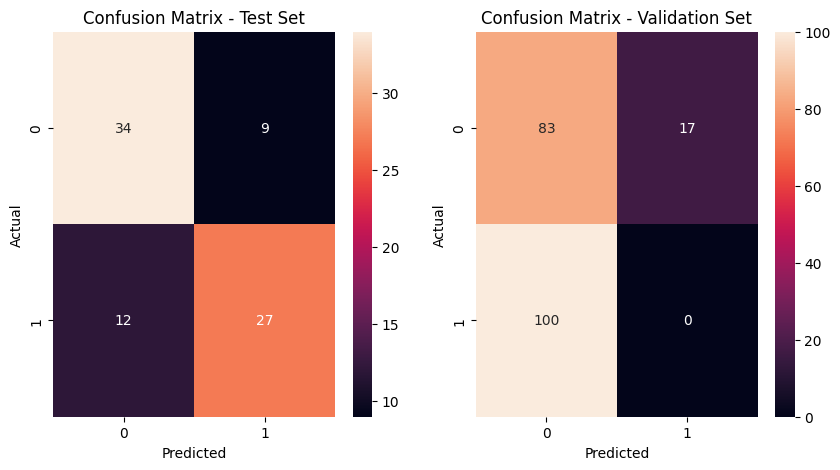

Test Set Metrics:
F1 Score: 0.7430967388325568
Precision: 0.7443001060445387
Recall: 0.7439024390243902
Validation Set Metrics:
F1 Score: 0.2932862190812721
Precision: 0.226775956284153
Recall: 0.415


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns

# Hyperparameters
num_epochs = 20
batch_size = 128
learning_rate = 0.0003

# Convert your numpy arrays to PyTorch tensors
train_dataset = torch.tensor(X_train, dtype=torch.float32)
test_dataset = torch.tensor(X_test, dtype=torch.float32)

# Create TensorDatasets and DataLoaders
train_loader = DataLoader(TensorDataset(train_dataset, torch.tensor(y_train, dtype=torch.long)), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(test_dataset, torch.tensor(y_test, dtype=torch.long)), batch_size=batch_size, shuffle=False)

# Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(X_train.shape[1], 16),
            nn.ReLU(True),
            nn.Linear(16, 10),
            nn.ReLU(True),
            nn.Linear(10, 5),
            nn.ReLU(True),
            nn.Linear(5, 3),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(3, 5),
            nn.ReLU(True),
            nn.Linear(5, 10),
            nn.ReLU(True),
            nn.Linear(10, 16),
            nn.ReLU(True),
            nn.Linear(16, X_train.shape[1]),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Create autoencoder object
autoencoder = Autoencoder()
# Reload the autoencoder
autoencoder.load_state_dict(torch.load('autoencoder.pth'))
encoder = autoencoder.encoder

# Prepare encoded features
X_train_encoded = encoder(torch.tensor(X_train, dtype=torch.float32)).detach().numpy()
X_test_encoded = encoder(torch.tensor(X_test, dtype=torch.float32)).detach().numpy()

# Convert your numpy arrays to PyTorch tensors
train_dataset = torch.tensor(X_train_encoded, dtype=torch.float32)
test_dataset = torch.tensor(X_test_encoded, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


# Create TensorDatasets and DataLoaders
train_loader = DataLoader(TensorDataset(train_dataset, y_train_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(test_dataset, y_test_tensor), batch_size=batch_size, shuffle=False)



# Create classifier object
classifier = model()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

# Train the classifier
train_loss = []
valid_loss = []
test_loss = []
train_acc = []
valid_acc = []
test_acc = []

for epoch in range(num_epochs):
    total_loss = 0
    correct = 0
    total = 0
    for data in train_loader:
        inputs, labels = data
        outputs = classifier(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_loss.append(total_loss / len(train_loader))
    train_acc.append(correct / total)

    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = classifier(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    test_loss.append(total_loss / len(test_loader))
    test_acc.append(correct / total)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss[-1]:.4f}, Test Loss: {test_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.4f}, Test Acc: {test_acc[-1]:.4f}')

# Save the trained classifier weights
torch.save(classifier.state_dict(), 'classifier.pth')

# Plot loss and accuracy
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train')
plt.plot(test_acc, label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('LossAccur3.pdf')
plt.show()

# Evaluate the model
y_true_test = []
y_pred_test = []
y_true_valid = []
y_pred_valid = []

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = classifier(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_true_test.extend(labels.numpy())
        y_pred_test.extend(predicted.numpy())

    for data in valid_loader:
        inputs, labels = data
        outputs = classifier(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_true_valid.extend(labels.numpy())
        y_pred_valid.extend(predicted.numpy())

# Plot confusion matrix for test set
cm_test = confusion_matrix(y_true_test, y_pred_test)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_test, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')

# Plot confusion matrix for validation set
cm_valid = confusion_matrix(y_true_valid, y_pred_valid)
plt.subplot(1, 2, 2)
sns.heatmap(cm_valid, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Validation Set')

plt.savefig('ConfusionMatrices.pdf')
plt.show()

# Report metrics for test set
f1_test = f1_score(y_true_test, y_pred_test, average='weighted')
precision_test = precision_score(y_true_test, y_pred_test, average='weighted')
recall_test = recall_score(y_true_test, y_pred_test, average='weighted')
print('Test Set Metrics:')
print('F1 Score:', f1_test)
print('Precision:', precision_test)
print('Recall:', recall_test)

# Report metrics for validation set
f1_valid = f1_score(y_true_valid, y_pred_valid, average='weighted')
precision_valid = precision_score(y_true_valid, y_pred_valid, average='weighted')
recall_valid = recall_score(y_true_valid, y_pred_valid, average='weighted')
print('Validation Set Metrics:')
print('F1 Score:', f1_valid)
print('Precision:', precision_valid)
print('Recall:', recall_valid)
